Analyze the effect of high dose naspm on spontaneous synaptic transmission

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

In [53]:
cd /data

/data


In [54]:
ls

Decay_tau_reci_uni.pdf                            test2016051004.mat*
E_I_age_PPR.pdf                                   test2016051005.mat*
E_I_age_decay_tau.pdf                             test2016051006.mat*
E_I_age_fail.pdf                                  test2016051501.mat*
E_I_age_onset_tau.pdf                             test2016051801.mat*
Failure_rate_reci_uni.pdf                         test2016051802.mat*
Failure_reci.pdf                                  test2016051804.mat*
Failure_uni.pdf                                   test2016051805.mat*
Figure0_3.pdf                                     test2016051806.mat*
Figure0_4.pdf                                     test2016051808.mat*
Figure0_5.pdf                                     test2016051809.mat*
Figure0_6.pdf                                     test2016052301.mat*
Figure0_7.pdf                                     test2016052302.mat*
Figure1A_1.pdf*                                   test2016052303.mat*
Figure1A_10.pdf*    

In [70]:
target = 125
psc_naspm_bef = pd.read_pickle('/data/psc_non_asso_2Hz_slope4_thres2.5_before_'+str(target))
psc_naspm_aft = pd.read_pickle('/data/psc_non_asso_2Hz_slope4_thres2.5_after_'+str(target))

In [71]:
psc_naspm_stim = pd.read_pickle('/data/ana_post_2Hz_reci')

In [72]:
psc_naspm_stim

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
121,"{'trace_y1': [[1.06718570617e-12, 1.9225931177...","{'trace_y1': [[8.98784491851e-13, 1.9378377103...",2017081802,30,"[0, 1, 15, 20, 21, 22, 25, 32, 39, 42, 78]","[52, 57, 64, 65]"
122,"{'trace_y1': [[3.88133921644e-12, 4.6779176446...","{'trace_y1': [[1.6089824765e-12, 2.09339359883...",2017082302,50,"[0, 3, 24, 25, 26, 37, 47, 50]","[67, 73, 80, 81, 82, 84, 88, 90, 96, 101, 116,..."
123,"{'trace_y1': [[3.01452594813e-13, 9.6920802909...","{'trace_y1': [[2.36300190311e-13, 1.4672657971...",2017082304,40,"[16, 18, 19]","[38, 44, 50, 56, 57, 71, 84, 88, 95]"
124,"{'trace_y1': [[3.24200114778e-12, 3.9289471339...","{'trace_y1': [[2.20848524723e-12, 2.7797074834...",2017082402,40,"[0, 2, 4, 10, 35, 54]",[37]
125,"{'trace_y1': [[4.85948500603e-13, 1.4763201741...","{'trace_y1': [[3.58226665576e-12, 5.5946305424...",2017083001,45,"[0, 9, 20, 22, 25, 31, 35, 49, 52, 56, 59]","[57, 63, 67, 70, 71, 80, 104]"
126,"{'trace_y1': [[6.5937641816e-14, 3.67299532041...","{'trace_y1': [[1.25534775954e-12, 1.1279376111...",2017083101,30,"[3, 5, 12, 13, 14, 15, 16, 19, 24, 44, 50, 67,...","[37, 39, 45, 46, 59, 60]"


In [73]:
target = 125
psc_naspm_stim.loc[target].Before.keys()

dict_keys(['trace_y1', 'x', 'ir', 'PPR', 'trace_y2', 'resp1_region', 'failure', 'rs', 'raw_amp2', 'onset_tau', 'spon_trace', 'ave_amp2', 'ave_all', 'raw_amp1', 'resp2_region', 'ave_amp1', 'decay_tau'])

In [74]:
decay_tau_stim_bef = np.array(psc_naspm_stim.loc[target].Before['decay_tau'])
decay_tau_stim_aft = np.array(psc_naspm_stim.loc[target].After['decay_tau'])

decay_tau_stim_bef = decay_tau_stim_bef[~np.isnan(decay_tau_stim_bef)]
decay_tau_stim_aft = decay_tau_stim_aft[~np.isnan(decay_tau_stim_aft)]

In [75]:
amp_stim_bef = np.array(psc_naspm_stim.loc[target].Before['raw_amp1'])
amp_stim_aft = np.array(psc_naspm_stim.loc[target].After['raw_amp1'])

amp_stim_bef = amp_stim_bef[~np.isnan(amp_stim_bef)]
amp_stim_aft = amp_stim_aft[~np.isnan(amp_stim_aft)]

In [76]:
np.log(np.min(decay_tau_stim_bef))

-6.999412527594683

In [77]:
para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)

In [78]:
log_amp_bef = np.log(para_bef['amp'])
log_amp_aft = np.log(para_aft['amp'])
log_decay_bef = np.log(para_bef['decay_tau'])
log_decay_aft = np.log(para_aft['decay_tau'])

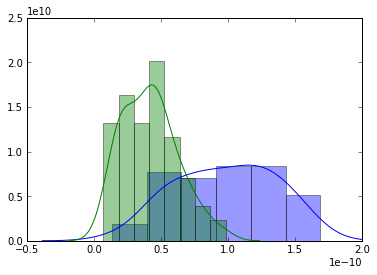

In [79]:
sns.distplot(amp_stim_bef)
sns.distplot(amp_stim_aft)
# plt.xlim([0, 1.4e-10])

(0, 1.4e-10)

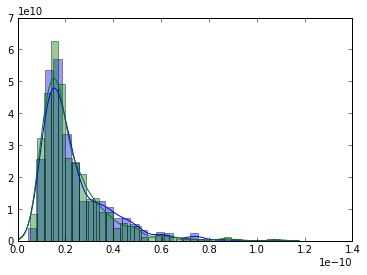

In [80]:
sns.distplot(para_bef['amp'])
sns.distplot(para_aft['amp'])
plt.xlim([0, 1.4e-10])

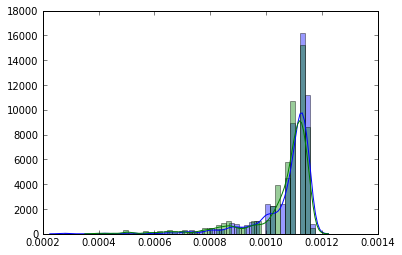

In [81]:
sns.distplot(para_bef['onset_tau'])
sns.distplot(para_aft['onset_tau'])

In [82]:
len(log_decay_bef)

580

In [83]:
len(log_decay_aft)

611

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


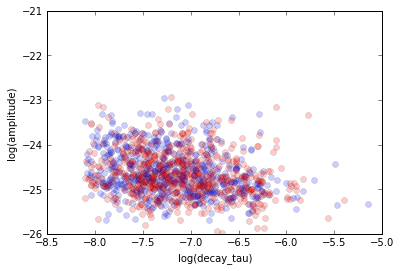

In [84]:
plt.plot(log_decay_bef,log_amp_bef, 'o', alpha=0.2)
plt.plot(log_decay_aft,log_amp_aft, 'ro', alpha=0.2)
plt.ylim([-26,-21])
plt.xlabel('log(decay_tau)')
plt.ylabel('log(amplitude)')

plt.legend()
# with PdfPages('/data/Figure3_10.pdf') as pdf:
#     pdf.savefig()

In [ ]:
len(np.where(log_decay_bef<-7.5)[0])

In [ ]:
len(np.where(log_decay_aft<-7.5)[0])

In [ ]:
sns.distplot(log_decay_bef, bins=3)
sns.distplot(log_decay_aft, bins=3)

In [ ]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['amp'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['amp'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

In [ ]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(log_decay_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(log_decay_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft,'r')
plt.xlim([-8.5, -5.5])

In [ ]:
import scipy
scipy.stats.ranksums(para_bef['decay_tau'], para_aft['decay_tau'])